# Introduction to Bayesian inference

Modern Bayesian models are in the class of computationally intensive models. Bayesian models are a rich class of models, which can provide attractive alternatives to frequentist models. Bayesian methods don't necessarily refer to a particular set of algorithms, but rather to a different approach to estimation. For example, we talk about regression and Bayesian regression, deep learning and Bayesian deep learning. In the context of hypothesis testing, we can also talk about Bayesian hypothesis testing. For this reason, **statistical inference** is divided between these two schools of thought: Frequentist and Bayesian paradigms. When the word **Bayesian** is not explicitly mentioned, we are relying on the frequentist paradigm, although the word frequentist is rarely mentioned.

## Bayes Theorem

Let's go through a simple derivation of Bayes' theorem. Remember the rule for conditional probability:

$$P(A|B) = \frac{P(A \cap B)}{p(B)} \qquad\text{and}\qquad P(B|A) = \frac{P(B \cap A)}{p(A)}$$

and by the symmetry $P(A \cap B) = P(B \cap A)$ we can eliminate $P(A \cap B)$ to get $P(B)P(A|B) = P(A)P(B|A)$ which we can use to rewrite the above equations as

$$P(A|B) = \frac{P(A)P(B|A)}{P(B)} \qquad\text{and}\qquad P(B|A) = \frac{P(B)P(A|B)}{P(A)}$$

The above equations is what we refer to as Bayes' theorem! It is a humble equation with many applications. 

Bayes' reasoning is that sometimes $P(A|B)$ is not easy to get but $P(B|A)$ is. For example, given that I have a disease, it's easy to know the probability that I will test positive, but given that I tested positive, it's not so easy to know the probability that I really have the disease. 

Here's another example: Let's say we toss a coin 4 times, and

- $A$ is the event that my coin is un-biased
- $B$ is the event that I get 3 heads

Then $P(A|B)$ is the probability that my coin is un-biased given that I got 3 heads. Knowing how to measure this probability is not obvious, but $P(B|A)$ is something we know how to do, since it has a binomial distribution with $n = 4$ and $p = 0.50$.

So Bayes' theorem gives us a formula for calculating $P(A|B)$ in terms of the $P(B|A)$. But to use it, we still need to answer the question of how we calculate $P(A)$ and $P(B)$: 

- It turns out that $P(A)$ is something we usually don't know, so most of the time we just guess it. This is the biggest critique of Bayesian analysis. However, in a lot of sitations, even a bad guess can still give us good results.
- The get $P(B)$ we need to integrate over the sample space of $A$. In other words, $P(B) = P(B|A)P(A) + P(B|A^c)P(A^c)$ where $A^c$ is the complement of $A$. This can also be cumbersome, but foretunately in practice we can often skip this step, for reasons we don't want to get into now.

Simplifying things, we now 

$$P(A|B) = \frac{P(A)P(B|A)}{P(B|A)P(A) + P(B|A^c)P(A^c)}$$

So we can simplify the formula by removing the denominator and replacing the equality with $\propto$ (proportional to).

$$P(A|B) \propto P(B|A)P(A)$$

### Exercise

A sample population has the following probabilities of eye and hair color combinations.

In [33]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import scipy
import itertools

In [2]:
prob_E_and_H = np.array([
    [0.11, 0.2 , 0.04, 0.01],
    [0.03, 0.14, 0.03, 0.16],
    [0.03, 0.09, 0.03, 0.02],
    [0.01, 0.05, 0.02, 0.03]])

hair_colors = ['black', 'brunette', 'red', 'blond']
eye_colors = ['brown', 'blue', 'hazel', 'green']

prob_E_and_H = pd.DataFrame(prob_E_and_H, columns = hair_colors, index = eye_colors)
prob_E_and_H

,black,brunette,red,blond
brown,0.11,0.20,0.04,0.01
blue,0.03,0.14,0.03,0.16
hazel,0.03,0.09,0.03,0.02
green,0.01,0.05,0.02,0.03


Note that we're using a string index for eye color rather than a numeric zero-based index. So here's the easiest way to access a given (eye, hair) color value.

In [3]:
prob_E_and_H.loc['hazel', 'red']

0.03

- The probabilities in the table above are **joint probabilities**, i.e. $P(E \cap H)$ if $E$ is eye color and $H$ is hair color. Given the joint probabilities, it is easy to compute the **marginal probabilities** $P(E)$ and $P(H)$ by summing the probabilities across rows and columns. Add a row and column to the data, containing the marginal probabilites of eye color and hair color.

In [4]:
prob_E_and_H_mar = prob_E_and_H.copy()
prob_E = prob_E_and_H.sum(axis = 1)
prob_H = prob_E_and_H.sum(axis = 0)

prob_E_and_H_mar.loc[:, 'prob_E'] = prob_E
prob_E_and_H_mar.loc['prob_H', :] = prob_H
prob_E_and_H_mar.loc['prob_H', 'prob_E'] = prob_E_and_H.values.sum()
prob_E_and_H_mar

,black,brunette,red,blond,prob_E
brown,0.11,0.20,0.04,0.01,0.36
blue,0.03,0.14,0.03,0.16,0.36
hazel,0.03,0.09,0.03,0.02,0.17
green,0.01,0.05,0.02,0.03,0.11
prob_H,0.18,0.48,0.12,0.22,1.00


- Compute $P(H|E = \text{blue})$. In other words, what is the distribution of hair color for people with blue eyes. You do not need to use Bayes' theorem here, just the conditioning rule:

$$P(H|E) = \frac{P(H \cap E)}{P(E)}$$

In [5]:
prob_H_given_E = prob_E_and_H.copy()

for hair in hair_colors:
    for eye in eye_colors:
        prob_H_given_E.loc[eye, hair] = prob_E_and_H.loc[eye, hair] / prob_E[eye]

prob_H_given_E

,black,brunette,red,blond
brown,0.305556,0.555556,0.111111,0.027778
blue,0.083333,0.388889,0.083333,0.444444
hazel,0.176471,0.529412,0.176471,0.117647
green,0.090909,0.454545,0.181818,0.272727


- Compute $P(E|H)$. In other words, what is the distribution of eye color given hair color. You do not need to use Bayes' theorem here, just the conditioning rule:

$$P(E|H) = \frac{P(H \cap E)}{P(H)}$$

In [6]:
prob_E_given_H = prob_E_and_H.copy()

for hair in hair_colors:
    for eye in eye_colors:
        prob_E_given_H.loc[eye, hair] = prob_E_and_H.loc[eye, hair] / prob_H[hair]

prob_E_given_H

,black,brunette,red,blond
brown,0.611111,0.416667,0.333333,0.045455
blue,0.166667,0.291667,0.250000,0.727273
hazel,0.166667,0.187500,0.250000,0.090909
green,0.055556,0.104167,0.166667,0.136364


As you can see, we were able to compute $P(E|H)$ and $P(H|E)$, and we didn't need Bayes' theorem to do it. Bayes' theorem is useful if one of these probabilities is easy to find, but the other one not. 

- Use Bayes' theorem to compute $P(E|H)$. Here's the theorem:

$$P(E|H) = \frac{P(H|E)P(E)}{P(H)}$$

In [7]:
prob_E_given_H = prob_E_and_H.copy()

for hair in hair_colors:
    for eye in eye_colors:
        prob_E_given_H.loc[eye, hair] = prob_H_given_E.loc[eye, hair] * prob_E[eye] / prob_H[hair]

prob_E_given_H

,black,brunette,red,blond
brown,0.611111,0.416667,0.333333,0.045455
blue,0.166667,0.291667,0.250000,0.727273
hazel,0.166667,0.187500,0.250000,0.090909
green,0.055556,0.104167,0.166667,0.136364


- Do you see the same probabilities as what we calculated above?

Assume now that we don't want to rely on $P(E)$ and $P(H)$ as calculated in the data (sample). Instead, let's say we have country-wide statistics about eye color in the population, as shown here:

In [8]:
prob_E_pop = prob_E.copy()
prob_E_pop[:] = [0.35, 0.25, 0.25, 0.15]
prob_E_pop

brown    0.35
blue     0.25
hazel    0.25
green    0.15
dtype: float64

- Calculate $P(H)$ based on the above values for $P(E)$ and using

$$P(H) = \sum_E P(H|E)P(E)$$

In [9]:
prob_H_new = prob_H.copy()
prob_H_new[:] = 0

for eye in eye_colors:
    prob_H_new += prob_H_given_E.loc[eye, :] * prob_E_pop[eye]

prob_H_new

black       0.185532
brunette    0.492201
red         0.131113
blond       0.191154
dtype: float64

- Recalculate $P(E|H)$ with Bayes' theorem, but using the new values for $P(E)$ and the updated values for $P(H)$.

In [10]:
prob_E_given_H_new = prob_E_and_H.copy()

for hair in hair_colors:
    for eye in eye_colors:
        prob_E_given_H_new.loc[eye, hair] = prob_H_given_E.loc[eye, hair] * prob_E_pop[eye] / prob_H_new[hair]

prob_E_given_H_new

,black,brunette,red,blond
brown,0.576421,0.395051,0.296607,0.050861
blue,0.112290,0.197525,0.158897,0.581264
hazel,0.237790,0.268900,0.336487,0.153864
green,0.073499,0.138524,0.208010,0.214011


So by changing our prior, we can see thet we get a new posterior distribution $P(E|H)$. Notice for example that the probability of being blond given that you have blue eyes has dropped in the new calculation. This is because we assume we have overall fewer blue-eyed people in the population than what was suggested by the data.

### End of exercise

## Bayesian vs frequentist paradigms

So why is Bayes's theorem so fundamental as to cause rift in the field in of statistics? To understand that, let's revisit the formula, but replace $A$ with $H$ and $B$ with $D$: 

$$P(H|D) = \frac{P(D|H)P(H)}{P(D)}$$

where $H$ stands for hypothesis and $D$ stands for data (think of it as evidence for or against the hypothesis). Note that in the frequentist paradigm, we only look at $P(D|H)$, that is we form a specific hypothesis, then ask how likely it is to just chance upon $D$ given $H$. In fact, statisticians refer to $P(D|H)$ as the **likelihood**. If for example $H = H_0$ and the likelihood $P(D|H_0)$ is very low (less than $\alpha$), we reject $H_0$, otherwise we fail to reject $H_0$. In the Bayesian paradigm we acknowledge that ultimately we should be looking at $P(H|D)$ and not $P(D|H)$. Once we have $P(H|D)$, we can easily test any hypothesis, not just $H_0$. So in Bayesian inference, we don't emphasize null and alternative hypotheses, and we don't rely on P-values and their less than ideal interpretation. Instead, we obtain the **posterior distribution** $P(H|D)$ from the likelihood $P(D|H)$ and the **prior distribution** $P(H)$ (which is usually no more than an educated guess). Recall that we said in an earlier lecture that the P-value is often *wrongly* interpreted as the probability that the hypothesis is true. The reason this interpretation was wrong is because what we are describing is not the P-value, but the posterior distribution!

So to summarize, we have

$$\text{posterior distribution (given data)} \propto \text{likelihood} \times \text{prior distribution (no data)}$$

The prior and posterior are distributions over the parameters of a population, such as $\mu$, $\sigma$ or the coefficients $\beta_i$ in a linear regression model described by $Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2$.

With greater computational power and general acceptance, Bayes methods are now widely used in areas ranging from medical research to natural language understanding to web search. Among pragmatists, the common belief today is that some problems are better handled by frequentist methods and some with Bayesian methods.

A very good explanation of Bayes' theorem can be found [here](https://www.youtube.com/watch?v=HZGCoVF3YvM&vl=en).

### The billiards game

Let's now look at a classical example to illustrate the difference between Bayesian and frequentist approaches: Say you roll a ball on a billiard table and mark its position on the table length-wise (across only one dimension). Then you start rolling other balls, and if the other balls land on the left side of the table your friend Alice gets a point, otherwise your friend Bob gets a point. Here's an illustration:

![Alice and Bob](./images/bayesian-billiards.jpg)

So here's the situation:

- Alice and Bob don't know where the first ball landed, so the only information they have is the current score. 
- The goal of the game is to be the first to reach 6 points.
- The current tally is that Alice has 5 points and Bob has 5. We refer to this as our **data**, $D$.

What is the probability of Bob winning the game? Note that for this to happen the ball needs to land on Bob's side the next three rounds. We are going to solve this both analytically and numerically using simulations. Let $B$ be the event that Bob wins. Let $D$ be the data, which is the current tally of scores. We want to know $P(B|D)$.

First let's see how a **frequentist** would solve this problem:

- Based on the data, the most likely value for $p$ is $3/8$, i.e. the average of the data so far: $\hat p = 3/8$.
- We can write $P(B|D)$ as $P(B|D, p = 3/8)$. Since $p$ is assumed to be fixed, there's no harm in conditioning on $p$.
- Since Bob needs to win the next three rounds, then he has a probability of $\hat p^3 = (3/8)^3 \approx 0.05$.

Now here's the **Bayesian** approach to solving this probelm.

- We should treat $p$ as a random variable and assume that it follows a uniform distribution between 0 and 1.
- We can rewrite $P(B|D)$ as such
$$P(B|D) = \frac{P(B|D)P(D)}{P(D)} = \frac{\int_0^1P(B|D,p)P(D|p)P(p)dp}{\int_0^1P(D|p)P(p)dp}$$
where the right-hand side basically says that since we don't know the value of $p$, we will average out over all possible values of $p$, which are all numbers between 0 and 1.
- We can now plug in the numbers and solve it:
$$P(B|D) = \frac{\int_0^1p^3(1-p)^5p^3dp}{\int_0^1(1-p)^5p^3dp} = \frac{\int_0^1(1-p)^5p^6dp}{\int_0^1(1-p)^5p^3dp} \approx 0.09$$

Notice that since the above integration only involved polynomial terms, we can solve it analytically without difficulty, but what if the integration is hard? One way to do it is to solve the integration numerically like this:

$$P(B|D) \approx \frac{\sum_{i = 1}^{n} p^3(1-p)^5p^3\Delta p}{\sum_{i = 1}^{n} (1-p)^5p^3\Delta p}$$

which is implemented here:

In [11]:
delta_p = 0.00001
n = int(1/delta_p)
p_range = np.linspace(0, 1, num = n)

numerator = np.sum([p**3 * (1-p)**5 * p**3 * delta_p for p in p_range])
denominator = np.sum([(1-p)**5 * p**3 * delta_p for p in p_range])
numerator / denominator

0.0909090909090909

An even better way to do it is by drawing random numbers $p$ from the uniform distribution, then feeding the results to the equation:

In [12]:
p = np.random.uniform(size = n)
prob_p = np.ones(n) / n
prob_D_given_p = p**3 * (1-p)**5
prob_B_given_Dp = p**3
numerator = np.sum(prob_B_given_Dp * prob_D_given_p * prob_p)
denominator = np.sum(prob_D_given_p * prob_p)
numerator / denominator

0.09085448421651564

Either way we can see that the results are close, however the second method is more powerful because it makes fewer assumption about the function. In practice, Bayesian inference relies heavily on numerical methods, albeit more sophisticated ones than the one shown above.

The frequentist approach gave Bob a probability of 5% to win and the Bayesian approach gave him a probability of 9%. So who's right? We can use Monte Carlo simulations to create such a scenario and let it play out over and over again.

In [14]:
hard_wins, wins_B = 0, 0
n_iters = 100000

for _ in range(n_iters): # number of simulations
    p = np.random.uniform(size = 1)
    points_A, points_B = 0, 0
    is_hard_win = False
    while points_A < 6 and points_B < 6:
        if points_A == 5 and points_B == 3:
            is_hard_win = True
            hard_wins += 1
        r = np.random.uniform(size = 1)
        if r < p:
            points_B += 1
        else:
            points_A += 1
    if is_hard_win and points_B == 6:
        wins_B += 1

print(wins_B / hard_wins)

0.08978075738358399


In [15]:
#sns.distplot(wins_b_ratio)

NameError: name 'wins_b_ratio' is not defined

It looks like at least in this case the Bayesians win!

## Bayesian inference in practice

In practice, the posterior distribution is estimated using computational methods as implemented in packages like `pymc` or `pystan`, with us only having to specify priors and provide the data. Here's a summary of a typical workflow:

1. Identify data relevant to the research question.
1. Define a descriptive model for the data. For example, pick a linear model formula.
1. Specify a prior distribution of the parameters.
1. Let the package run through the computation to estimate the posterior distribution.
1. Update the posterior distribution if more data is observed. This is key! The posterior of a Bayesian model naturally updates as more data is added, a form of **online learning**. With frequentist methods, as new data comes in we often have to **retrain** the model (but not always).
1. If needed, we can than simulate data values from realizations of the posterior distribution of the parameters.

Of the steps outlined above, choosing a prior distribution is the only steps that is somewhat left to chance. In general, a prior must be convincing to a skeptical audience, and if needed we can perform the analysis using different priors in order to see how sensitive the analysis is to the choice of the prior distribution. When trying to make an educated guess about priors, we can follow some approaches, such as

- letting past observations determine the prior
- using domain knowledge or theory
- use a **non-informative prior** such as the uniform distribution (but we still need to specify the range)
 
One analytically and computationally simple choice is a **conjugate prior**: When a likelihood is multiplied by a conjugate prior the distribution of the posterior is the same as the prior. Most named distributions have conjugates. A few commonly used examples are shown in the table below:

Likelihood | Conjugate
---|---
Binomial|Beta
Bernoulli|Beta
Poisson|Gamma
Categorical|Dirichlet
Normal| Normal, Inverse Gamma

However, there are many practical cases where a conjugate prior is not used.

## A simple example

With a bit of theory in mind, let's pull things together with an example. Let's say we are interested in analyzing distracted drivers. We sample the behavior of 10 drivers at an intersection and determine if they exhibit signs of distracted driving or not. The data is binomially distributed: a driver is distracted or not. Here's what we cover in this example:

- How to select a prior for the parameter $p$, the probability of distracted driving.
- How to compute the likelihood from the data.
- How to estimate the posterior distributions.
- Try another prior distribution to compare results.
- Add more data to our data set to update the posterior distribution.

The likelihood of the data and the posterior distribution are binomially distributed. The binomial distribution has one parameter we need to estimate, $p$, the probability of success (if you can call distracted driving a success!). We can write this formally for $k$ successes in $n$ trials:

$$ P(K = k) = \binom{n}{k} \cdot p^k(1-p)^{n-k}$$

The code in the cell below creates a simple data set of distracted drivers and computes some simple summary statistics.

In [34]:
drivers = ['yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes']
distracted = [1 if x is 'yes' else 0 for x in drivers]
distracted

[1, 0, 1, 0, 0, 1, 0, 0, 0, 1]

In [17]:
n = len(distracted)  # sample size
n_distracted = sum(distracted)  # number of distracted drivers
n_not = n - n_distracted # number not distracted
print('Distracted drivers = %d Attentive drivers = %d \nProbability of distracted driving = %.1f' \
      % (n_distracted, n_not, n_distracted / (n_distracted + n_not)))

Distracted drivers = 4 Attentive drivers = 6 
Probability of distracted driving = 0.4


The following helper function will later help us visualize the results.

In [18]:
def plot_pp(x, p, l, pp):
    sns.lineplot(x, l, color = 'lightgrey', linewidth = 10)
    sns.lineplot(x, p, color = 'blue', linewidth = 2)
    sns.lineplot(x, pp, color = 'red', linewidth = 2)
    plt.xlabel('p')
    plt.ylabel('PDF of p')
    plt.title('Prior, likelihood and posterior distributions')
    plt.legend(labels = ['likelihood', 'prior', 'posterior'])
    return None

Let's select a prior distribution $P(p)$ for our one model parameter $p$. We don't know a lot about drivers at this point, so we choose a uniform distribution ranging from 0 to 1.

In [19]:
n = 100
# prior = np.random.uniform(size = n)
x = np.linspace(0, 1, num = n)
prior = np.ones(n) * 1/n

Next, we need to compute the likelihood. We can view the observation of each driver as distracted or not as a Bernoulli trial, so the number of distracted drivers follows a binomial distribution with $n$ trials and a probability $p$ of a driver being distracted. The likelihood is the probability of the data given the parameter $p$.

In [20]:
def likelihood(p, data):
    k = int(sum(data))
    N = len(data)
    # l = scipy.special.comb(N, k) * p**k * (1-p)**(N-k) # compute Binomial likelihood
    l = scipy.stats.binom.pmf(k, N, p)
    return l / l.sum() # normalize the likelihood to sum to unity

like = likelihood(x, distracted)

Now that we have a prior and a likelihood we are in a position to compute the posterior distribution $P(p|X)$ of the parameter $p$. The code in the cell below computes and plots the posterior, given the prior and likelihood.

***
<span style="color: magenta;">**Warning!**</span>  The computational methods used in this notebook are simplified for the purpose of illustration. For real-world problems, computationally efficient code must be used!
***

In [21]:
def posterior(prior, like):
    post = prior * like # compute the product of the probabilities
    return post / post.sum() # normalize the distribution to sum to unity

post = posterior(prior, like)

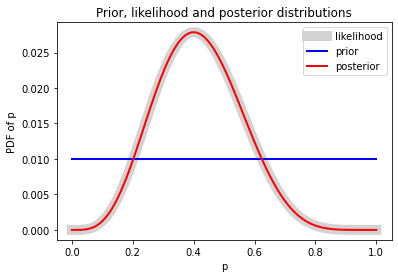

In [22]:
plot_pp(x, prior, like, post)

In [23]:
print('Maximum likelihood = %.3f' % x[np.argmax(like)])
print('MAP = %.3f' % x[np.argmax(post)])

Maximum likelihood = 0.404
MAP = 0.404


Notice that with uniform prior distribution, the posterior is just the likelihood. This is an important observation. The key point is that the frequentist probabilities are identical to the Bayesian posterior distribution given a uniform prior.  

### Another Prior

Let's try another prior distribution. We will chose the **conjugate prior** of the Binomial distribution which is the beta distribution. Formally, we can write the beta distribution:

$$\text{Beta}(p | a, b) = \kappa x^{a-1}(1 - x)^{b-1}$$

where $\kappa$ is a normalization constant.

The beta distribution is defined on the interval $0 \le \text{Beta}(p | a,b) \le 1$. The beta distribution has two parameters, $a$ and $b$, which determine the shape. To get a feel for the beta distribution, execute the code in the cell below which computes 100 examples on a 10x10 grid.

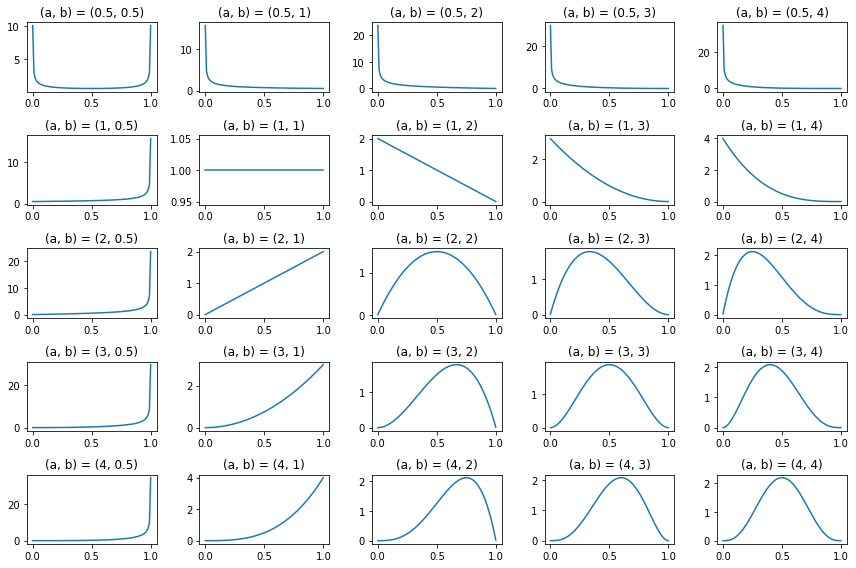

In [24]:
plt.figure(figsize = (12, 8))

alpha = [.5, 1, 2, 3, 4]
beta = alpha[:]
x = np.linspace(.001, .999, num = 100)

for i, (a, b) in enumerate(itertools.product(alpha, beta)):
    plt.subplot(len(alpha), len(beta), i+1)
    sns.lineplot(x, scipy.stats.beta.pdf(x, a, b))
    plt.title('(a, b) = ({}, {})'.format(a,b))

plt.tight_layout()   

You can see from the plots above, that the beta distribution can take on quite a range of shapes, depending on the parameters. Generally if $a \gt b$ the distribution skews to the rights, if $a \lt b$ to the left, and symmetric if $ a = b$.

We still do not know a lot about the behavior of drivers, so we will pick a rather vague or broad beta distribution as our prior. The code in the cell below uses a symmetric prior with $a = 2$ and $b = 2$.

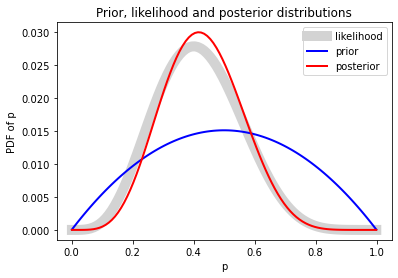

In [28]:
def beta_prior(x, a, b):
    l = scipy.stats.beta.pdf(x, a, b)  # compute likelihood
    return l / l.sum()  # normalize and return

prior = beta_prior(x,  2, 2)
post = posterior(prior, like)
plot_pp(x, prior, like, post)

Notice that the mode of the posterior is close to the mode of the likelihood, but has shifted toward the mode of the prior. We call this tendency of Bayesian posteriors to be shifted toward the prior the **shrinkage property**. The tendency of the maximum likelihood point of the posterior is said to shrink toward the maximum likelihood point of the prior. 

We can now see that the posterior probability of distracted driving has a rather wide spread. How can we get a more definitive understanding of the probability of distracted driving?

### Adding data to the Bayesian model

Let's say that we observe some more drivers and gather some more data on distracted driving. Additional data will narrow the spread of the posterior distribution. As you might expect, adding more observations to the model, moves the posterior closer to the likelihood. 

In fact, as data is added to a Bayesian model, the posterior moves toward the likelihood. This property has two important implications:

- The prior matters less as more data is added to a Bayesian model.
- Adding data reduces shrinkage.
- The inferences from Bayesian and frequentist models tend to converge as data set sizes grow and the posterior approaches the likelihood.

**But, be careful!** With large scale problems with large numbers of parameters you may need enormous data sets to see the convergence in behavior. 

The code in the cell below adds another 10 observations to our data set. Execute this code and examine the results. How do the likelihood and posterior distributions compare with the case with only 10 data points.

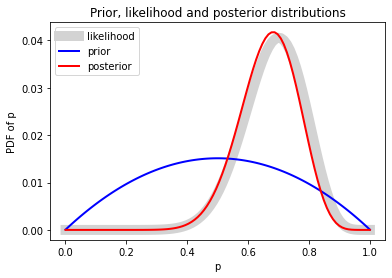

In [29]:
new_drivers = ['yes','yes','yes','yes','yes','yes','yes','yes','yes','yes' ]  # new data
new_distracted = [1 if x is 'yes' else 0 for x in new_drivers]

like = likelihood(x, distracted + new_distracted)
post = posterior(prior, like)
plot_pp(x, prior, like, post)

You can change the new data to be a series of `no` values or a series of `yes` values and see how the distribution changes accordingly.

### Simulating new data

So once we have the posterior distribution, what do we do with it? For starters, because it's a distribution, we can draw samples from it, similar to what we do with simulations. So far we've learned how to draw samples from pre-defined distributions like the normal or binomial by calling `np.random.normal(size = 10)` for example. But how do we draw samples from an undefined posterior distribution? We use `np.random.choice`, give it the values that we want to sample from, and use the posterior distribution as a **sampling weight** (see the `p` argument below).

In [30]:
np.random.choice(x, size = 10, p = post) # draw samples from the posterior distribution

array([0.66633333, 0.77722222, 0.60584848, 0.72681818, 0.75706061,
       0.81754545, 0.66633333, 0.63609091, 0.56552525, 0.67641414])

So far, we have drawn from the posterior distribution of the probability parameter $p$. But what about the distribution of distracted drivers? To get that, we need to rely on the fact that if we have $n$ drivers and $p$ is the probability of a driver being distracted, then $np$ is the number of distracted drivers. Since we are treating $p$ not as a fixed value but a random variable, the more correct way to write it is $nP$ (using an upper-case).

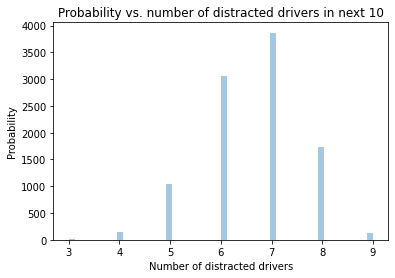

In [32]:
num_cars = 10
num_samples = 10000

counts = (num_cars * np.random.choice(x, size = num_samples, replace = True, p = post)).round()
sns.distplot(counts, kde = False)
plt.title('Probability vs. number of distracted drivers in next %d' % num_cars)
plt.xlabel('Number of distracted drivers')
plt.ylabel('Probability');

## Credible intervals

A **credible interval** is an interval on the Bayesian posterior distribution. The credible interval is sometimes called the highest density interval (HDI), or highest posterior density interval (HPI). As an example, the 90% credible interval encompasses the 90% of the posterior distribution with the highest probability density.  

The credible interval is the Bayesian analog of the frequentist confidence interval. However, these two measures are conceptually different. The confidence interval is chosen on the distribution of a test statistic, whereas the credible interval is computed on the posterior distribution of the parameter. For symmetric distributions the credible interval can be numerically the same as the confidence interval. However, in the general case, these two quantities can be quite different.  

The code in the cell below, plots the posterior distribution of the parameter of the binomial distribution parameter $p$.

***
<span style="color: magenta;">**Warning!**</span> This code assumes a symmetric prior distribution, so will not work in the general case. 
***

The 0.950 credible interval is 0.025 to 0.975


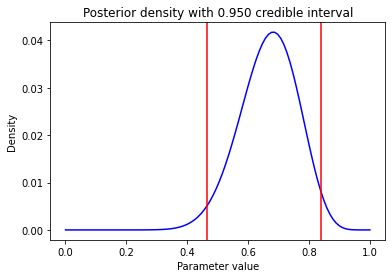

In [35]:
num_samples = 100000
lower_q, upper_q = [.025, .975]

def plot_ci(p, post, num_samples, lower_q, upper_q, **kw):
    ## This function computes a credible interval using an assumption
    ## of symetry in the bulk of the distribution to keep the 
    ## calculation simple. 
    ## Compute a large sample by resampling with replacement
    samples = np.random.choice(p, size = num_samples, replace = True, p = post)
    ci = np.percentile(samples, [lower_q*100, upper_q*100]) # compute the quantiles
    
    interval = upper_q - lower_q
    plt.title('Posterior density with %.3f credible interval' % interval)
    sns.lineplot(p, post, color = 'blue', **kw)
    plt.xlabel('Parameter value')
    plt.ylabel('Density')
    plt.axvline(x = ci[0], color = 'red')
    plt.axvline(x = ci[1], color = 'red')
    print('The {:0.3f} credible interval is {:0.3f} to {:0.3f}'.format(interval, lower_q, upper_q))
    
plot_ci(x, post, num_samples, lower_q, upper_q)

## Comparing Bayesian models

How can we use Bayesian models to compare two distributions? It turns out that we can compare Bayesian models in several ways. In this lesson, we will compute and compare credible intervals of the posterior distribution of a model parameter. 

For this example, we will compare the posterior distribution of the heights of sons to the heights of the mothers in the Galton family dataset. As a first step, we will compute and evaluate Bayesian models for the mean heights using a subset of just 25 observations. 

The code in the cell below sub-samples the Galton family data and then plots histogram of the heights of sons and mothers. Execute this code and examine the results.

In [36]:
file_name = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/GaltonFamilies.csv'
families = pd.read_csv(file_name, index_col = 0)
families.head()

,father,mother,midparentHeight,children,childNum,gender,childHeight
family,,,,,,,
001,78.5,67.0,75.43,4,1,male,73.2
001,78.5,67.0,75.43,4,2,female,69.2
001,78.5,67.0,75.43,4,3,female,69.0
001,78.5,67.0,75.43,4,4,female,69.0
002,75.5,66.5,73.66,4,1,male,73.5


Mean of heights: 67.4


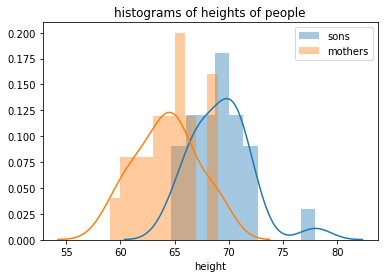

In [52]:
num_samples = 25
male = families[families.gender == 'male'].sample(n = num_samples)

plt.title('histograms of heights of people')
sns.distplot(male['childHeight'], label = 'sons', bins = 10)
sns.distplot(male['mother'], label = 'mothers', bins = 10)
plt.xlabel('height')
plt.legend()

mean_height = np.concatenate([male.mother, male.father, male.childHeight,]).mean()
print('Mean of heights: %.1f' % mean_height)

To perform this analysis, we need to select a prior distribution and compute the likelihood. First, we will address the likelihood. 

For these data, we will use a Normal likelihood. For any individual sample $X$ if it follows the normal distribution then it's density function is given by

$$X \sim N(\mu, \sigma) \Rightarrow P(X | \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \Bigg[ -\frac{1}{2}\big(\frac{X - \mu}{\sigma}\big)^2\Bigg]$$

For a sample ${X_1, X_2, \cdots, X_n}$ of $n$ independent normally distributed observations has the following likelihood:

$$P(X_1, X_2, \cdots, X_n | \mu, \sigma) = \prod_{i = 1}^n P(X_i | \mu, \sigma) = \prod_{i=1}^n \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \Bigg[ -\frac{1}{2}\big(\frac{X_i - \mu}{\sigma}\big)^2\Bigg]$$

First we can simplify things by ignoring the terms outside the exponential, since they don't depends on the sample, and replacing $=$ (is equal to) with $\propto$ (is proportional to):

$$P(X_1, X_2, \cdots, X_n | \mu, \sigma) \propto \prod_{i = 1}^n \exp \Bigg[ -\frac{1}{2}\big(\frac{X_i - \mu}{\sigma}\big)^2\Bigg]$$

Moreover, we can rely on the property $e^a e^b = e^{a + b}$ to rewrite the left-hand side as

$$P(X_1, X_2, \cdots, X_n | \mu, \sigma) \propto \exp \Bigg[ -\frac{1}{2} \sum_{i = 1}^n \big(\frac{X_i - \mu}{\sigma}\big)^2\Bigg]$$

Letting $\bar X = \sum_{i=1}^n X_i$ we can rewrite $X_i - \mu$ as $X_i - \bar X + \bar X - \mu$:



$$P(X_1, X_2, \cdots, X_n | \mu, \sigma) \propto \exp \Bigg[ -\frac{1}{2 \sigma^2}  \Bigg( \sum_{i = 1}^n (X_i - \bar{X})^2 + n(\bar{X} - \mu)^2 \Bigg) \Bigg]$$

To simplify the computations here, we will only estimate the posterior distribution of $\mu$. We will use a fixed empirical estimate of the standard deviation. A more complete analysis will also estimate the posterior distribution of $\sigma$.

Mean = 69.224, Standard deviation = 2.756


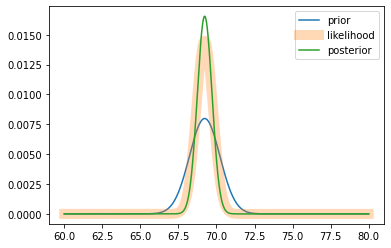

In [57]:
N = 1000
x = np.linspace(60, 80, num = N)
prior_son = scipy.stats.norm.pdf(x, loc = male['childHeight'].mean(), scale = 1)
prior_son = prior_son / prior_son.sum() # normalize

def likelihood(p, x): 
    x_var = np.var(x) # sigmasqr
    x_mean = np.mean(x)  # xbar
    print('Mean = %.3f, Standard deviation = %.3f' % (x_mean, x_var**0.5))
    n = len(x)
    l = np.exp((-1/(2*x_var)) * (sum((x - x_mean)**2) + n*(x_mean - p)**2))
    return l / l.sum()

likelihood_son = likelihood(x, male['childHeight'])
posterior_son = posterior(prior_son, likelihood_son)

sns.lineplot(x, prior_son, label = 'prior')
sns.lineplot(x, likelihood_son, label = 'likelihood', alpha = .3, linewidth = 10)
sns.lineplot(x, posterior_son, label = 'posterior')
plt.legend();

The code in the cell below computes the posterior distribution of the heights of the mothers. Run this code and examine the results. How do these results differ from the results for the heights of the sons?

Mean = 64.240, Standard deviation = 2.793


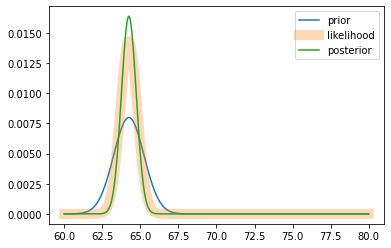

In [59]:
prior_mom = scipy.stats.norm.pdf(x, loc = male['mother'].mean(), scale = 1)
prior_mom = prior_mom / prior_mom.sum() # normalize

likelihood_mom = likelihood(x, male['mother'])
posterior_mom = posterior(prior_mom, likelihood_mom)

sns.lineplot(x, prior_mom, label = 'prior')
sns.lineplot(x, likelihood_mom, label = 'likelihood', alpha = .3, linewidth = 10)
sns.lineplot(x, posterior_mom, label = 'posterior')
plt.legend();

To compare the posterior distributions of the mean heights of the sons to the distribution of the mean heights of the mothers, we compute and compare the confidence intervals. 

We can see how much overlap there is between the sons and mothers by comparing their credible intervals. 

The 0.950 credible interval is 0.025 to 0.975
The 0.950 credible interval is 0.025 to 0.975


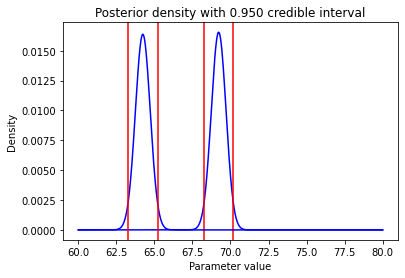

In [60]:
num_samples = 100000

plot_ci(x, posterior_son, num_samples, lower_q = .025, upper_q = .975)
plot_ci(x, posterior_mom, num_samples, lower_q = .025, upper_q = .975);

Since the CIs don't even overlap, it can follow that the sons were significantly taller than their mothers.

### Simulation from the posterior distribution

Once we have a posterior distribution for parameters we can simulate from this distribution. The simulation consists of taking a number of random draws from the posterior parameter distribution and computing the posterior distribution of the data values. 

There are a number of reasons why you might want to simulate from the posterior distribution of data values.

- Test the model against the data.
- Compute forecasts of the dependent (label) variable from the model.

The code in the cell below computes the posterior distribution of the heights of sons. This is done by computing the distribution of height based on realizations of the parameter (the mean) from the posterior distribution. The density distribution of the simulated heights is plotted along with the histogram of the original data. Execute this code and examine the results.

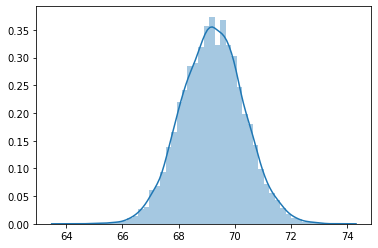

In [61]:
def sim_height(n, sigma, p, post):
    # create the probability-weighted random sample of values of the mean height
    mu = np.random.choice(p, size = n, replace = True, p = post)
    return scipy.stats.norm.rvs(loc = mu, scale = sigma, size = n)

sns.distplot(sim_height(10000, sigma = 1, p = x, post = posterior_son));

## Summary

You should now be familiar with 

- what Bayes' theorem is and why it's so useful
- how Bayesian inference uses Bayes' theorem and what sets it apart from frequentist inference
- how computational methods can help us approximate posterior distributions when analytic solutions may be hard to come by

If this lesson was useful, we encourage you to read more about Bayesian inference through topics like importance sampling, Markov Chain Monte Carlo simulations and Bayesian modeling.